## Latent "Purposes" in Mobile Apps [50 points]


Think of Android applications as "documents", where "words" are the "permissions" that each app requests. Each app has a set of latent "purposes" (topics); a "purpose" may be a specific task (such as taking photographs and uploading them to the internet), and an application may have a mixture of purposes of varying strength.

Can we uncover these purposes from a dataset of Android applications and the permissions they request?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Part A: Load the data [0 points]

The [dataset](http://www.mariofrank.net/andrApps/) contains ~180,000 applications from the Android app store, including each app's name, description and permissions requested. For more about Android app permissions, see [this report](http://www.pewinternet.org/2015/11/10/an-analysis-of-android-app-permissions/).

   * Download the data and unzip it into the same folder as this notebook.
   * Rename the CSV file to "android.csv".
   * Run the cells below to load the data into the notebook.

This may take up ~2GB of RAM.

In [2]:
df = pd.read_csv("android.csv", sep=",",  thousands=",")

In [5]:
df["Number of ratings"] = df["Number of ratings"].astype(int) # fix data type
df = df.drop_duplicates(subset=["App"]).reset_index(drop=True) 
# subset:only consider certain columns for identifying duplicates
# reset_index(): old index is added as columns, and a new sequential index is used 

In [6]:
df.head(n=3)

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S)
0,Google Maps,com.google.android.apps.maps,Travel & Local,"Download the latest release of Google Maps, an...",4.4,1438259,$0.00,"{com.jsdfproductions.ctatrackerpro, com.alk.co...",17.0,8,...,0,0,1,0,0,0,0,0,1,0
1,Snowfall Live Wallpaper,fishnoodle.snowfall_free,Personalization,Snowfall Live Wallpaper: Wintertime on your ho...,4.3,18147,$0.00,"{colfore.wallpaper.snowfree, com.tabsoft.wallp...",0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aquarium Live Wallpaper,fishnoodle.aquarium_free,Personalization,A beautiful tropical fish tank live wallpaper!...,4.1,62145,$0.00,"{com.convisual.lwp.fishometerlite, com.accessl...",0.0,0,...,0,0,0,0,0,0,0,0,0,0


### Part B: Convert each app into a "document" [0 points]

The code below does the following:

   * Filter out all the columns except the permission columns.
   * Convert this dataframe into a numpy matrix.

There are thus 180295 apps (documents) and 173 permissions (words).

   - `X` is the "document" or "word-frequency" matrix.
   - `permission_columns` contains the words ordered by their column index in X.
   - `app_names` contains the application names ordered by their row index in X.
   - `app_ratings` contains the *number* of application ratings (not the ratings themselves).

In [8]:
permission_columns = list(df.columns[10:])
app_names = list(df["App"])
app_ratings = np.array(df["Number of ratings"])
df_perms = df[permission_columns]
X = df_perms.as_matrix()
del df # uncomment to free up RAM
del df_perms # uncomment to free up RAM

### Part C: Downweight "stop-words" [2.5 points]

There are some permissions requested by almost all applications (like "INTERNET"), they are similar to stop-words ("the", "and", etc.) in natural language. We can downweight them by TF-IDF normalization.

   * Use the `TfidfTransformer` class in `scikit-learn` to transform X.

In [11]:
########################################################################
######################### Write your code here #########################
########################################################################
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = TfidfTransformer()
X = vectorizer.fit_transform(X)

In [12]:
X.shape

(180295, 173)

### Part D: Discover 10 "topics" [2.5 points]

   * Use the `LatentDirichletAllocation` class in `scikit-learn` to fit 10 topics to the data.
   * Use 10 max iterations, set `n_jobs=-1` to use all cores on your machine (if it helps).
   * Feel free to understand and play around with other parameters.
   * This may take around 3 minutes to run.

In [ ]:
# Tunning parameters:
# 1. n_componenes
# 2. learning_decay
# 3. learning_offset
# 4. max_iter

In [13]:
%%time
########################################################################
######################### Write your code here #########################
########################################################################
from sklearn.decomposition import LatentDirichletAllocation
component = 10
lda = LatentDirichletAllocation(n_components=component,n_jobs=-1,learning_method='online',random_state=95865,max_iter=10)
lda.fit(X)

Wall time: 5min 48s


Now each app can be viewed as a distribution over these 10 topics, and each topic is a distribution over all the permissions in the data.

### Part E: List the top 10 "words" in each topic [15 points]

Do any of the topics correspond to meaningful app "purposes"? List the ones you find meaningful below:

In [52]:
########################################################################
######################### Write your code here #########################
########################################################################
for i in range(component):
    print('\nTopic ',i,":")
    topic_index_sort = np.argsort(lda.components_[i])[::-1][:10]
    for permission in topic_index_sort:
        print(permission_columns[permission])


Topic  0 :
System tools : automatically start at boot (S)
Your location : fine (GPS) location (D)
Your location : coarse (network-based) location (D)
Hardware controls : control vibrator (S)
Network communication : view network state (S)
Phone calls : read phone state and identity (D)
Your location : mock location sources for testing (D)
Network communication : full Internet access (D)
Your location : access extra location provider commands (S)
Storage : modify/delete USB storage contents modify/delete SD card contents (D)

Topic  1 :
Network communication : full Internet access (D)
Network communication : view network state (S)
Services that cost you money : directly call phone numbers (D)
Your personal information : read contact data (D)
Hardware controls : record audio (D)
Services that cost you money : send SMS messages (D)
Default : mock location sources for testing (S)
Your messages : write instant messages (D)
Default : start IM service (S)
Default : act as an account authentic

*** WRITE YOUR ANSWER HERE IN TEXT ***

* Topic #0: "Access user's location"
* Topic #3: "Service that might send message to user"
* Topic #7: "Photograph and uploading"
* Topic #9: "Change wallpaper"

### Part F: For each topic, list the top 3 apps with at least 100000 ratings having the highest probability assigned to that topic [15 points]

   - This further helps us understand what the topics actually mean.
   - However, the data is noisy and this exercise may result in listing a bunch of obscure apps.
   - Hence, filtering out all apps with less than 100000 ratings may help.

In [29]:
########################################################################
######################### Write your code here #########################
########################################################################
XX = lda.fit_transform(X)
XX.shape #(180295, 10)

(180295, 10)

In [45]:
app_names = np.array(app_names)
for i in range(XX.shape[1]):
    app_rating_idx = app_ratings>100000
    XX_ = XX[app_rating_idx,i]
    name = app_names[app_rating_idx]
    app_top = np.argsort(XX_)[::-1][:3]
    print('\nTopic ',i," : ")
    for app in app_top:
        print(name[app])


Topic  0  : 
Vaulty Free Hides Pictures
Live Holdem Poker Pro
Mouse Trap

Topic  1  : 
Angry Birds Seasons
Yoo Ninja! Free
Adobe Reader

Topic  2  : 
Meet New People
Movies
Wordfeud FREE

Topic  3  : 
Google Translate
chompSMS
TweetCaster for Twitter

Topic  4  : 
Paradise Island
My Country
World Newspapers

Topic  5  : 
Google Sky Map
Ringdroid
Zedge Ringtones & Wallpapers

Topic  6  : 
SpeechSynthesis Data Installer
Adobe Flash Player 11
Adobe Reader

Topic  7  : 
Toss It
Dictionary.com
Air Control Lite

Topic  8  : 
Real BlackJack
Alchemy
Tank Hero

Topic  9  : 
Yahoo! Mail
Gmail
Twitter


### Part G: Visualize the document-topic proportion matrix in 2-D using t-SNE [15 points]

Does our reduced dimensional space contain any structure? Visualize the documents (in the topic-space) using t-SNE.

   * Use `TSNE` from `scikit-learn`.
   * Set the angle to 0.99 and init to 'PCA'. Pick any learning rate that gives you a visually pleasing result.
   * You may `fit` TSNE to a sample of the data (>1000 documents) instead of the full data.
   * Remember to call `fit_transform` to obtain your 2-D data.
   * Plot the t-SNE dimensions as a scatterplot.
   * Color each point based on its most probable topic. Make sure you include a legend (10 colors).
   
Clusters in the t-SNE plot indicate groups of apps that have similar topics.

In [54]:
%%time
########################################################################
######################### Write your code here #########################
########################################################################
from sklearn.manifold import TSNE
sample = np.random.permutation(XX.shape[0])[:1500]
X_sample = XX[sample,:]
tsne = TSNE(n_components=2, angle=0.99, init='pca')
X_tsne = tsne.fit_transform(X_sample)

Wall time: 37.9 s


In [76]:
# XX.shape #(180295, 10)
cluster_assignment = []
for i in range(X_sample.shape[0]):
    toprank_for_doc = np.argsort(X_sample[i,:])[::-1][0]
    cluster_assignment.append(toprank_for_doc)

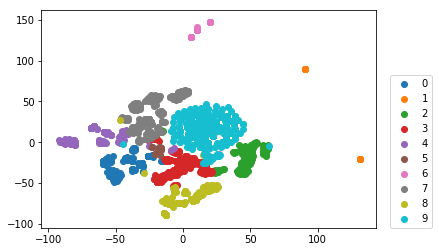

In [100]:
assignment = np.unique(cluster_assignment)
for i in assignment:
    idx = np.array(cluster_assignment)==i
    X_tsne_i = X_tsne[idx,:]
    plt.scatter(X_tsne_i[:,0],X_tsne_i[:,1],label = str(i))
plt.legend(loc=(1.04,0))